### Kmeans

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

In [14]:
X = pd.read_csv('preprocessed_flights2.csv')

In [15]:
X.sample(5)

,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,LAST_TO_END,avg_discount,FFP_TIER_4,FFP_TIER_5,FFP_TIER_6,TOTAL_DISTANCE
1340,-0.106242,2.085050,0.534388,0.140384,0.122834,1,0,0,-0.221521
2480,1.698459,1.825554,0.494131,-1.258953,0.088383,0,1,0,3.100627
50992,-0.937931,-0.710536,-2.299868,0.054053,-1.115837,1,0,0,0.666433
22856,0.035082,0.292951,0.410810,-0.109855,0.325008,1,0,0,0.010277
25935,0.035082,0.140977,0.528072,1.119575,0.320067,1,0,0,0.004946


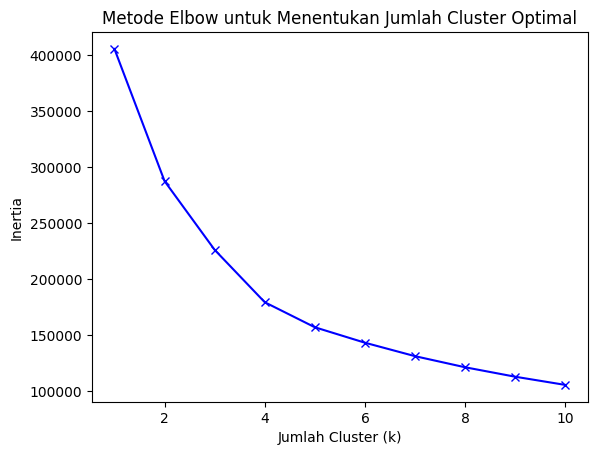

In [16]:
Sum_of_squared_distances = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.show()


Jumlah Klaster: 2, Silhouette Score: 0.3059
Jumlah Klaster: 3, Silhouette Score: 0.3318
Jumlah Klaster: 4, Silhouette Score: 0.2930
Jumlah Klaster: 5, Silhouette Score: 0.2640
Jumlah Klaster: 6, Silhouette Score: 0.2450
Jumlah Klaster: 7, Silhouette Score: 0.2403
Jumlah Klaster: 8, Silhouette Score: 0.2400
Jumlah Klaster: 9, Silhouette Score: 0.2543
Jumlah Klaster: 10, Silhouette Score: 0.2434


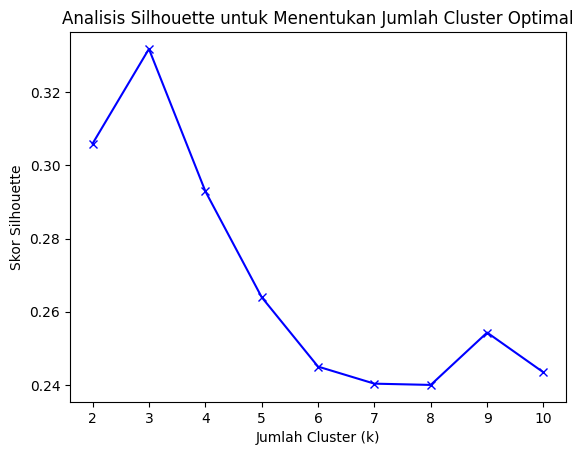

In [18]:
silhouette_scores = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'Jumlah Klaster: {k}, Silhouette Score: {score:.4f}')

plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Skor Silhouette')
plt.title('Analisis Silhouette untuk Menentukan Jumlah Cluster Optimal')
plt.show()

Dari grafik tersebut, berikut interpretasinya:

1. Nilai Silhouette Tertinggi: Nilai Silhouette Score tertinggi tampaknya berada di k = 2, dengan skor di atas 0.6. Hal ini menunjukkan bahwa pembagian data menjadi dua cluster memberikan pemisahan antar cluster yang jelas dan konsistensi internal yang baik dalam cluster.

2. Penurunan Skor: Setelah k = 2, terjadi penurunan Silhouette Score yang cukup tajam. Ini menunjukkan bahwa menambahkan cluster tambahan menyebabkan pengurangan kualitas clustering.

3. Dukungan dari Analisis K-Means (Metode Elbow): Dari metode elbow sebelumnya, titik optimal tampaknya berada di k = 3 atau 4. Namun, jika mengacu pada analisis Silhouette Score, memilih k = 2 dapat memberikan clustering yang lebih berkualitas.

Kesimpulannya:

Dari kedua grafik (K-Means dan Silhouette), k = 3 tampaknya menjadi jumlah cluster yang seimbang, memberikan hasil yang baik dalam hal kualitas cluster dan pemisahan data.

Jumlah Klaster: 2, Silhouette Score: 0.3059
Jumlah Klaster: 3, Silhouette Score: 0.3318
Jumlah Klaster: 4, Silhouette Score: 0.2930
Jumlah Klaster: 5, Silhouette Score: 0.2640
Jumlah Klaster: 6, Silhouette Score: 0.2450
Jumlah Klaster: 7, Silhouette Score: 0.2403
Jumlah Klaster: 8, Silhouette Score: 0.2400
Jumlah Klaster: 9, Silhouette Score: 0.2543
Jumlah Klaster: 10, Silhouette Score: 0.2434


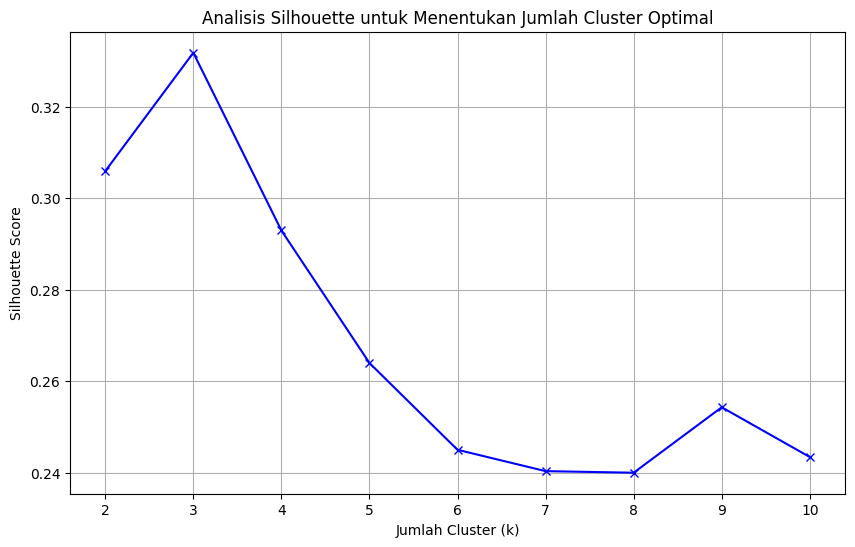

In [21]:
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)
    print(f'Jumlah Klaster: {k}, Silhouette Score: {score:.4f}')

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Analisis Silhouette untuk Menentukan Jumlah Cluster Optimal')
plt.grid(True)
plt.show()

In [23]:
internal_scores = {
    'Silhouette': [],
    'Davies-Bouldin': [],
    'Calinski-Harabasz': []
}

K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, max_iter=300, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_

    # Silhouette Score
    silhouette_avg = silhouette_score(X, labels)
    internal_scores['Silhouette'].append(silhouette_avg)

    # Davies-Bouldin Index
    dbi = davies_bouldin_score(X, labels)
    internal_scores['Davies-Bouldin'].append(dbi)

    # Calinski-Harabasz Index
    ch_index = calinski_harabasz_score(X, labels)
    internal_scores['Calinski-Harabasz'].append(ch_index)

    print(f'Jumlah Klaster: {k}, Silhouette Score: {silhouette_avg:.4f}, DBI: {dbi:.4f}, CH Index: {ch_index:.4f}')

Jumlah Klaster: 2, Silhouette Score: 0.3059, DBI: 1.2816, CH Index: 25784.5452
Jumlah Klaster: 3, Silhouette Score: 0.3318, DBI: 1.1679, CH Index: 24918.4085
Jumlah Klaster: 4, Silhouette Score: 0.2930, DBI: 1.1664, CH Index: 26399.5027
Jumlah Klaster: 5, Silhouette Score: 0.2640, DBI: 1.1993, CH Index: 24852.4913
Jumlah Klaster: 6, Silhouette Score: 0.2450, DBI: 1.1781, CH Index: 23005.5686
Jumlah Klaster: 7, Silhouette Score: 0.2403, DBI: 1.1802, CH Index: 21884.2964
Jumlah Klaster: 8, Silhouette Score: 0.2400, DBI: 1.2670, CH Index: 21023.1721
Jumlah Klaster: 9, Silhouette Score: 0.2543, DBI: 1.2049, CH Index: 20355.7558
Jumlah Klaster: 10, Silhouette Score: 0.2434, DBI: 1.2081, CH Index: 19829.6323


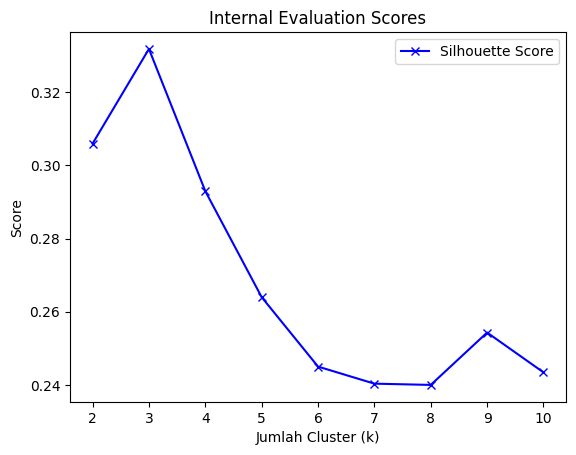

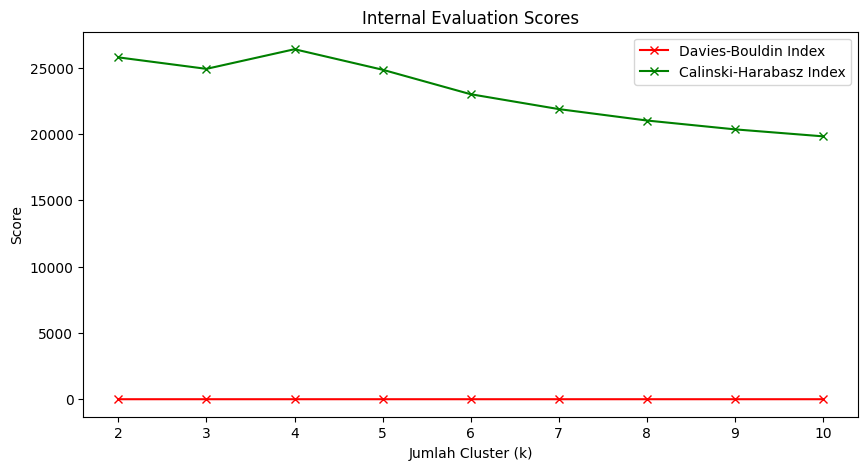

In [24]:
# Plotting Silhouette Score
plt.plot(K, internal_scores['Silhouette'], 'bx-', label='Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Score')
plt.title('Internal Evaluation Scores')
plt.legend()
plt.show()

# Plotting Davies-Bouldin Index and Calinski-Harabasz Index
plt.figure(figsize=(10, 5))
plt.plot(K, internal_scores['Davies-Bouldin'], 'rx-', label='Davies-Bouldin Index')
plt.plot(K, internal_scores['Calinski-Harabasz'], 'gx-', label='Calinski-Harabasz Index')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Score')
plt.title('Internal Evaluation Scores')
plt.legend()
plt.show()

* Jumlah Klaster Optimal: Berdasarkan Calinski-Harabasz Index, jumlah klaster
optimal tampaknya berada di sekitar 4, karena mencapai skor tertinggi di titik tersebut. Hal ini menunjukkan bahwa pada klaster ini, struktur klaster paling efektif dalam memisahkan data.

* Stabilitas Davies-Bouldin Index: Davies-Bouldin Index yang rendah dan stabil mengindikasikan bahwa semua konfigurasi klaster memiliki kualitas klaster yang cukup baik, tetapi jumlah klaster 4 tetap menjadi pilihan yang optimal karena didukung oleh Calinski-Harabasz Index.

## Nomor 4

In [25]:
X2 = X.copy()
kmeans = KMeans(n_clusters=3,  init='random', n_init=10, max_iter=300, random_state=42)
kmeans.fit(X2)
score = silhouette_score(X2, kmeans.labels_)
print(f'Jumlah Klaster: 3, Silhouette Score: {score:.4f}')

Jumlah Klaster: 3, Silhouette Score: 0.3318


In [26]:
data_clustering = pd.read_csv('data_clustering.csv')

In [27]:
data_clustering.sample(5)

,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,LAST_TO_END,avg_discount,FFP_TIER
45375,1.386294,8.484257,0.000000,4.532599,0.550523,4
20216,2.197225,9.634431,2.084400,6.139885,0.583265,4
35285,2.197225,9.091332,1.917486,4.290459,0.504594,4
60290,1.098612,7.835579,0.000000,3.637586,0.384530,4
37282,1.945910,9.221478,1.825611,2.890372,0.421370,4


In [28]:
data_clustering['cluster'] = kmeans.labels_
data_clustering

,FLIGHT_COUNT,SEG_KM_SUM,SUM_YR_1,LAST_TO_END,avg_discount,FFP_TIER,cluster
0,5.351858,13.272021,2.192695,0.693147,0.673780,6,2
1,4.948760,12.590243,2.192695,2.079442,0.811958,6,2
2,4.912655,12.555718,2.192695,2.484907,0.813006,6,2
3,3.178054,12.547309,2.192695,4.584967,0.737580,5,2
4,5.030438,12.644099,2.192695,1.791759,0.678367,6,2
...,...,...,...,...,...,...,...
62841,1.098612,7.034388,0.000000,5.697093,0.000000,4,0
62842,1.609438,8.989320,0.000000,4.499810,0.000000,4,0
62843,1.098612,7.861342,0.000000,3.401197,0.000000,4,0
62844,1.098612,8.277666,0.000000,5.993961,0.000000,4,0


In [30]:
rekomendasi= data_clustering.groupby('cluster', as_index = False).agg(
      mean_flight_count = ('FLIGHT_COUNT', 'mean'),
      mean_seg_km_sum = ('SEG_KM_SUM', 'mean'),
      mean_sum_yr_1 = ('SUM_YR_1', 'mean'),
      mean_last_to_end = ('LAST_TO_END', 'mean'),
      mean_avg_discount = ('avg_discount', 'mean'),
      mean_fpp_tier = ('FFP_TIER', 'mean'),
      median_flight_count = ('FLIGHT_COUNT', 'median'),
      median_seg_km_sum = ('SEG_KM_SUM', 'median'),
      median_sum_yr_1 = ('SUM_YR_1', 'median'),
      median_last_to_end = ('LAST_TO_END', 'median'),
      median_avg_discount = ('avg_discount', 'median'),
      median_fpp_tier = ('FFP_TIER', 'median'),
  )

rekomendasi



,cluster,mean_flight_count,mean_seg_km_sum,mean_sum_yr_1,mean_last_to_end,mean_avg_discount,mean_fpp_tier,median_flight_count,median_seg_km_sum,median_sum_yr_1,median_last_to_end,median_avg_discount,median_fpp_tier
0,0,1.555359,8.529856,0.000000,4.238640,0.516187,4.041130,1.386294,8.481773,0.000000,4.543295,0.520732,4.0
1,1,1.904233,8.942864,1.985371,4.980644,0.533897,4.017979,1.945910,9.007490,1.991747,5.192957,0.534733,4.0
2,2,3.363791,10.568660,2.076558,2.888675,0.564147,4.388885,3.295837,10.514529,2.102743,2.890372,0.551130,4.0


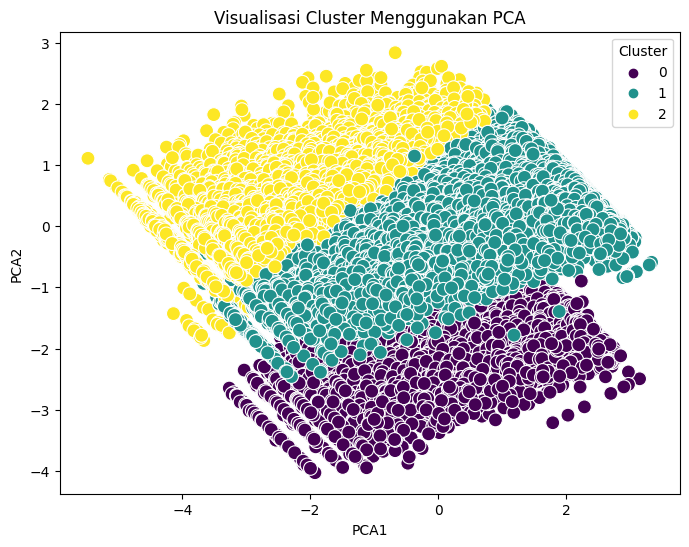

KeyError: 'PCA1'

<Figure size 800x600 with 0 Axes>

In [31]:
from sklearn.decomposition import PCA

# Ambil kolom fitur untuk PCA
features = data_clustering.iloc[:, 1:14]  # Sesuaikan dengan kolom fitur Anda
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(features)

# Tambahkan hasil PCA ke data
data_clustering["PCA1"] = reduced_data[:, 0]
data_clustering["PCA2"] = reduced_data[:, 1]

# Scatter plot untuk hasil PCA
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x="PCA1",
    y="PCA2",
    hue="cluster",
    data=data_clustering,
    palette="viridis",
    s=100
)
plt.title("Visualisasi Cluster Menggunakan PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(title="Cluster")
plt.show()

# Scatter plot menggunakan hasil PCA untuk visualisasi cluster
plt.figure(figsize=(8, 6))
plt.scatter(
    rekomendasi["PCA1"],
    rekomendasi["PCA2"],
    c=rekomendasi["cluster"],
    cmap="viridis",
    s=100,
    alpha=0.7,
    edgecolor="k"
)
plt.colorbar(label="Cluster")
plt.title("Scatter Plot Cluster Menggunakan PCA")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.grid(True)
plt.show()



### b. Deskripsi Kontekstual Pelanggan di Masing-Masing Cluster  
1. **Cluster 0 (Pelanggan Loyal dan Aktif)**:  
   - **Rata-rata**:
     - **Flight Count**: 3.52 (sering terbang).  
     - **Segment KM Sum**: 10.65 (jarak perjalanan sangat tinggi).  
     - **Average Discount**: 0.62 (sering menggunakan diskon).  
     - **FFP Tier**: 5.30 (berada di tier tertinggi).  
   - Pelanggan ini adalah frequent flyers aktif dengan kontribusi besar pada pendapatan perusahaan.  

2. **Cluster 1 (Pelanggan Dormant atau Jarang Terbang)**:  
   - **Rata-rata**:
     - **Flight Count**: 1.55 (jarang terbang).  
     - **Segment KM Sum**: 8.53 (jarak perjalanan rendah).  
     - **Average Discount**: 0.51 (tidak terlalu fokus pada diskon).  
     - **FFP Tier**: 4.02 (tier rendah-menengah).  
   - Pelanggan ini kemungkinan besar sudah mulai tidak aktif dan jarang menggunakan layanan penerbangan.  

3. **Cluster 2 (Pelanggan High-Value Dormant)**:  
   - **Rata-rata**:
     - **Flight Count**: 2.16 (cukup sering terbang, namun menurun).  
     - **Segment KM Sum**: 9.23 (jarak perjalanan moderat).  
     - **Average Discount**: 0.53 (diskon sedang).  
     - **FFP Tier**: 4.00 (tier menengah).  
   - Pelanggan ini mungkin memiliki potensi nilai tinggi, namun kurang aktif baru-baru ini.  

---

### c. Rekomendasi Bisnis  
1. **Cluster 0 (Loyal dan Aktif)**:  
   - **Strategi Retensi**:  
     Tawarkan program eksklusif, seperti akses lounge VIP, atau penawaran kelas premium untuk meningkatkan loyalitas.  
   - **Upselling**:  
     Promosikan layanan tambahan, seperti asuransi perjalanan atau upgrade bagasi.

2. **Cluster 1 (Dormant/Low-Value)**:  
   - **Reaktivasi Pelanggan**:  
     Buat marketing bertarget, seperti diskon besar atau undangan ke acara eksklusif untuk menarik kembali pelanggan ini.  
   - **Analisis Feedback**:  
     Kumpulkan feed back untuk memahami penyebab dormansi mereka, misalnya harga, rute, atau layanan.

3. **Cluster 2 (High-Value Dormant)**:  
   - **Strategi Reaktivasi Khusus**:  
     Berikan insentif, seperti poin loyalitas ekstra, untuk menarik mereka kembali.  
   - **Peningkatan Personalisasi**:  
     Gunakan data perjalanan mereka sebelumnya untuk memberikan penawaran yang disesuaikan, seperti promosi rute yang sering mereka gunakan.  

